In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from statsmodels.tsa.filters.hp_filter import hpfilter
import numpy as np

# Directory paths
employ_dir = 'EMPLOY'
gnpall_dir = 'GNPALL'

# Function to load all CSVs in a directory into a dictionary of dataframes
def load_data_from_directory(directory):
    data_frames = {}
    for filename in os.listdir(directory):
        if filename.endswith('.csv'):
            path = os.path.join(directory, filename)
            # Assume DATE is the index column and is formatted correctly
            data_frames[filename[:-4]] = pd.read_csv(path, index_col='DATE', parse_dates=True)
    return data_frames

In [2]:
# Load all data from directories
employ_data = load_data_from_directory(employ_dir)
gnpall_data = load_data_from_directory(gnpall_dir)

In [3]:
employ_data

{'AWHNONAG':             AWHNONAG
 DATE                
 1964-01-01      38.2
 1964-02-01      38.5
 1964-03-01      38.5
 1964-04-01      38.6
 1964-05-01      38.6
 ...              ...
 2024-01-01      33.6
 2024-02-01      33.7
 2024-03-01      33.8
 2024-04-01      33.7
 2024-05-01      33.8
 
 [725 rows x 1 columns],
 'PAYEMS':                          PAYEMS
 DATE                           
 1939-01-01   30101.000000000000
 1939-04-01   30298.333333333333
 1939-07-01   30704.333333333333
 1939-10-01   31474.333333333333
 1940-01-01   31714.333333333333
 ...                         ...
 2023-04-01  155766.000000000000
 2023-07-01  156433.000000000000
 2023-10-01  157050.000000000000
 2024-01-01  157820.666666666667
 2024-04-01                    .
 
 [342 rows x 1 columns],
 'USGOOD':                             USGOOD
 DATE                              
 1939-01-01  11234.0000000000000000
 1939-04-01  11309.0000000000000000
 1939-07-01  11497.0000000000000000
 1939-10-01  12004.

In [4]:
gnpall_data

{'PSAVE':                PSAVE
 DATE                
 1947-01-01    12.595
 1947-04-01     8.476
 1947-07-01    12.635
 1947-10-01    10.372
 1948-01-01    12.763
 ...              ...
 2023-01-01   948.202
 2023-04-01  1027.551
 2023-07-01   863.889
 2023-10-01   759.752
 2024-01-01   796.608
 
 [309 rows x 1 columns],
 'GNPDEF':              GNPDEF
 DATE               
 1947-01-01   11.113
 1947-04-01   11.273
 1947-07-01   11.464
 1947-10-01   11.746
 1948-01-01   11.840
 ...             ...
 2023-01-01  121.168
 2023-04-01  121.673
 2023-07-01  122.668
 2023-10-01  123.177
 2024-01-01  124.107
 
 [309 rows x 1 columns],
 'PRFI':                 PRFI
 DATE                
 1947-01-01    10.541
 1947-04-01    10.573
 1947-07-01    12.466
 1947-10-01    15.254
 1948-01-01    15.345
 ...              ...
 2023-01-01  1060.808
 2023-04-01  1052.612
 2023-07-01  1082.395
 2023-10-01  1100.790
 2024-01-01  1141.427
 
 [309 rows x 1 columns],
 'CPROFIT':              CPROFIT
 DATE         

In [5]:
# Extract relevant data
gnp = gnpall_data['GNP']
pcend = gnpall_data['PCEND']
pces = gnpall_data['PCES']
fpi = gnpall_data['FPI']
pcedg = gnpall_data['PCEDG']
awhnonag = employ_data['AWHNONAG']
ce16ov = employ_data['CE16OV']
pop = employ_data['POP']


In [6]:
# Find the intersection of the indices (dates)
common_dates = gnp.index.intersection(pcend.index)
common_dates = common_dates.intersection(pces.index)
common_dates = common_dates.intersection(fpi.index)
common_dates = common_dates.intersection(pcedg.index)
common_dates = common_dates.intersection(awhnonag.index)
common_dates = common_dates.intersection(ce16ov.index)
common_dates = common_dates.intersection(pop.index)

In [7]:
# Filter each dataframe to include only the common dates
gnp = gnp.loc[common_dates]
pcend = pcend.loc[common_dates]
pces = pces.loc[common_dates]
fpi = fpi.loc[common_dates]
pcedg = pcedg.loc[common_dates]
awhnonag = awhnonag.loc[common_dates]
ce16ov = ce16ov.loc[common_dates]
pop = pop.loc[common_dates]

In [8]:
# Create a new DataFrame that contains all the relevant series
data = pd.DataFrame({
    'GNP': gnp['GNP'],
    'PCEND': pcend['PCEND'],
    'PCES': pces['PCES'],
    'FPI': fpi['FPI'],
    'PCEDG': pcedg['PCEDG'],
    'AWHNONAG': awhnonag['AWHNONAG'],
    'CE16OV': ce16ov['CE16OV'],
    'POP': pop['POP']
})

In [9]:
# Convert relevant columns to numeric, coercing errors to NaN
data['PCEND'] = pd.to_numeric(data['PCEND'], errors='coerce')
data['PCES'] = pd.to_numeric(data['PCES'], errors='coerce')
data['FPI'] = pd.to_numeric(data['FPI'], errors='coerce')
data['PCEDG'] = pd.to_numeric(data['PCEDG'], errors='coerce')
data['AWHNONAG'] = pd.to_numeric(data['AWHNONAG'], errors='coerce')
data['CE16OV'] = pd.to_numeric(data['CE16OV'], errors='coerce')
data['POP'] = pd.to_numeric(data['POP'], errors='coerce')
data['GNP'] = pd.to_numeric(data['GNP'], errors='coerce')

# Calculate required variables
data['Consumption'] = data['PCEND'] + data['PCES']
data['Investment'] = data['FPI'] + data['PCEDG']
data['Output1'] = data['Consumption'] + data['Investment']
data['Labor'] = data['AWHNONAG'] * data['CE16OV']
data['Productivity'] = data['Output1'] / data['Labor']

In [10]:
# Convert series to per capita terms
data['Output_per_Capita'] = data['GNP'] / data['POP']
data['Consumption_per_Capita'] = data['Consumption'] / data['POP']
data['Investment_per_Capita'] = data['Investment'] / data['POP']
data['Output1_per_Capita'] = data['Output1'] / data['POP']
data['Labor_per_Capita'] = data['Labor'] / data['POP']
data['Productivity_per_Capita'] = data['Productivity'] / data['POP']

# Display the first few rows to verify calculations
print(data.head())

                GNP       PCEND   PCES      FPI      PCEDG  AWHNONAG  CE16OV  \
DATE                                                                           
1964-01-01  674.880  148.633333  191.6  105.350  57.966667      38.2   68327   
1964-04-01  683.549  151.466667  195.3  106.062  59.500000      38.6   69356   
1964-07-01  697.079  154.866667  199.0  107.939  61.333333      38.6   69399   
1964-10-01  702.017  155.766667  202.5  109.968  59.366667      38.5   69582   
1965-01-01  723.225  157.766667  206.1  114.998  64.933333      38.7   69997   

                      POP  Consumption  Investment     Output1      Labor  \
DATE                                                                        
1964-01-01  190857.666667   340.233333  163.316667  503.550000  2610091.4   
1964-04-01  191452.666667   346.766667  165.562000  512.328667  2677141.6   
1964-07-01  192132.000000   353.866667  169.272333  523.139000  2678801.4   
1964-10-01  192839.000000   358.266667  169.334667  52

In [11]:
#Growth Rate
growth_rates = data.pct_change().dropna()
# does it matter when you drop NA values. Are you dropping NAs that never existed(never collected by the fred)
#or NAs produced by merging the data

In [12]:
growth_rates

,GNP,PCEND,PCES,FPI,PCEDG,AWHNONAG,CE16OV,POP,Consumption,Investment,Output1,Labor,Productivity,Output_per_Capita,Consumption_per_Capita,Investment_per_Capita,Output1_per_Capita,Labor_per_Capita,Productivity_per_Capita
DATE,,,,,,,,,,,,,,,,,,,
1964-04-01,0.012845,0.019063,0.019311,0.006758,0.026452,0.010471,0.015060,0.003118,0.019203,0.013748,0.017434,0.025689,-0.008049,0.009698,0.016035,0.010598,0.014272,0.022501,-0.011131
1964-07-01,0.019794,0.022447,0.018945,0.017697,0.030812,0.000000,0.000620,0.003548,0.020475,0.022411,0.021100,0.000620,0.020468,0.016188,0.016867,0.018796,0.017490,-0.002918,0.016860
1964-10-01,0.007084,0.005811,0.017588,0.018798,-0.032065,-0.002591,0.002637,0.003680,0.012434,0.000368,0.008530,0.000039,0.008490,0.003392,0.008722,-0.003299,0.004832,-0.003627,0.004793
1965-01-01,0.030210,0.012840,0.017778,0.045741,0.093768,0.005195,0.005964,0.002833,0.015631,0.062578,0.030699,0.011190,0.019293,0.027300,0.012762,0.059576,0.027787,0.008333,0.016413
1965-04-01,0.017432,0.019015,0.017467,0.030314,-0.002053,0.000000,0.009086,0.002634,0.018139,0.018633,0.018302,0.009086,0.009133,0.014759,0.015464,0.015957,0.015627,0.006435,0.006482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-01,0.014234,0.005189,0.023778,0.018126,0.030938,0.000000,0.008965,0.001050,0.019144,0.022168,0.020052,0.008965,0.010989,0.013170,0.018075,0.021096,0.018983,0.007907,0.009929
2023-04-01,0.009772,0.003063,0.011861,0.012675,-0.000592,-0.005882,0.005058,0.001113,0.009698,0.008453,0.009323,-0.000854,0.010186,0.008649,0.008576,0.007332,0.008201,-0.001965,0.009063
2023-07-01,0.019756,0.019286,0.014929,0.010766,0.004969,0.000000,0.001535,0.001432,0.015993,0.008938,0.013872,0.001535,0.012318,0.018298,0.014540,0.007496,0.012422,0.000103,0.010871


In [13]:
# Calculate means and standard deviations of growth rates
growth_stats = growth_rates.agg(['mean', 'std']).transpose()
growth_stats.columns = ['Mean Growth Rate', 'Standard Deviation of Growth Rate']

In [14]:
growth_stats

,Mean Growth Rate,Standard Deviation of Growth Rate
GNP,0.015785,0.012479
PCEND,0.013950,0.013662
PCES,0.017833,0.017083
FPI,0.016428,0.022045
PCEDG,0.015698,0.031378
AWHNONAG,-0.000522,0.004921
CE16OV,0.003672,0.013016
POP,0.002363,0.000727
Consumption,0.016521,0.015015
Investment,0.016107,0.021990


In [15]:
# Output is Consumption + Investment
# Compute the long-run average of the "investment" to "output1" ratio
investment_output1_ratio = data['Investment'] / data['Output1']
long_run_avg_ratio = investment_output1_ratio.mean()

In [16]:
investment_output1_ratio

DATE
1964-01-01    0.324331
1964-04-01    0.323156
1964-07-01    0.323570
1964-10-01    0.320952
1965-01-01    0.330879
                ...   
2023-01-01    0.300950
2023-04-01    0.300691
2023-07-01    0.299228
2023-10-01    0.298805
2024-01-01    0.297253
Length: 241, dtype: float64

In [17]:
long_run_avg_ratio

0.3142413837413927

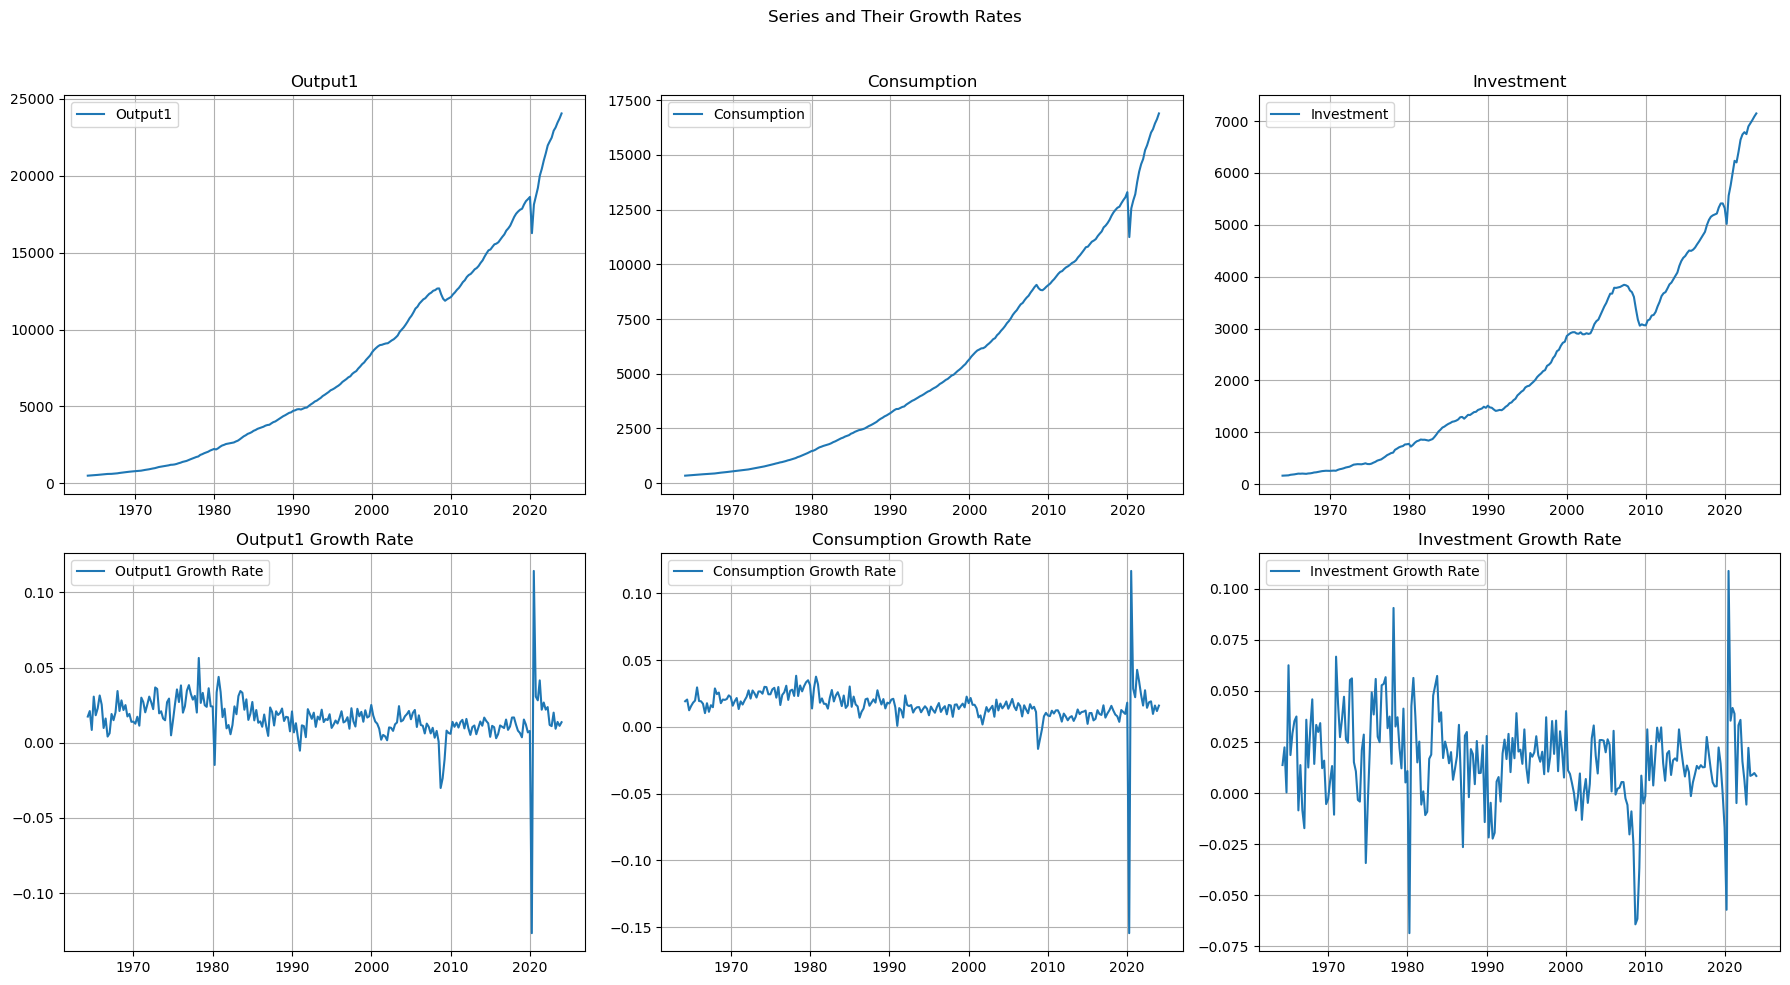

In [18]:
# Plot the series and their growth rates
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
fig.suptitle('Series and Their Growth Rates')

axes[0, 0].plot(data['Output1'], label='Output1')
axes[0, 0].set_title('Output1')
axes[1, 0].plot(growth_rates['Output1'], label='Output1 Growth Rate')
axes[1, 0].set_title('Output1 Growth Rate')

axes[0, 1].plot(data['Consumption'], label='Consumption')
axes[0, 1].set_title('Consumption')
axes[1, 1].plot(growth_rates['Consumption'], label='Consumption Growth Rate')
axes[1, 1].set_title('Consumption Growth Rate')

axes[0, 2].plot(data['Investment'], label='Investment')
axes[0, 2].set_title('Investment')
axes[1, 2].plot(growth_rates['Investment'], label='Investment Growth Rate')
axes[1, 2].set_title('Investment Growth Rate')

for ax in axes.flat:
    ax.legend()
    ax.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
#Graphs are in hundreds of thousands on Y-axis

In [19]:
# Log and detrend all variables using the Hodrick-Prescott filter
log_data = np.log(data).dropna()
#same thing with NAs are they dropping

# Function to apply HP filter to each column
def apply_hp_filter(series):
    cycle, trend = hpfilter(series, lamb=1600)
    return cycle, trend

# Apply the HP filter to each column
cycle = pd.DataFrame()
trend = pd.DataFrame()
for column in log_data.columns:
    cycle[column], trend[column] = apply_hp_filter(log_data[column])
    
#dumb question but does this function handle the trend and cycle on its own
    

# Display the first few rows of the cycle and trend components
print(cycle.head())
print(trend.head())

                 GNP     PCEND      PCES       FPI     PCEDG  AWHNONAG  \
DATE                                                                     
1964-01-01  0.003188 -0.004916  0.007649 -0.005276 -0.012794 -0.014215   
1964-04-01 -0.003373 -0.002736  0.007346 -0.017967 -0.006351 -0.002630   
1964-07-01 -0.003099  0.002763  0.006678 -0.019848  0.004340 -0.001453   
1964-10-01 -0.015369 -0.008135  0.004664 -0.020631 -0.047888 -0.002851   
1965-01-01 -0.004935 -0.012059  0.002808  0.004733  0.022133  0.003558   

              CE16OV       POP  Consumption  Investment   Output1     Labor  \
DATE                                                                          
1964-01-01 -0.006060 -0.001509     0.002346   -0.007980 -0.001055 -0.020275   
1964-04-01  0.003124 -0.001257     0.003108   -0.013839 -0.002442  0.000494   
1964-07-01 -0.002016 -0.000575     0.005116   -0.011185 -0.000232 -0.003469   
1964-10-01 -0.005137  0.000241    -0.000792   -0.030308 -0.010406 -0.007988   
1965-01

In [20]:
# Compute standard deviations and correlation coefficients of cyclical components
cycle_stats = cycle.agg(['std']).transpose()
correlation_matrix = cycle.corr()


In [21]:
# Compare the behavior of "output" to "output1"
output_vs_output1 = cycle[['GNP', 'Output1']].corr().iloc[0, 1]

In [22]:
# Print the statistics
print("Standard Deviations of Cyclical Components:")
print(cycle_stats)
print("\nCorrelation Matrix of Cyclical Components:")
print(correlation_matrix)
print(f"\nCorrelation between 'output' and 'output1': {output_vs_output1}")

Standard Deviations of Cyclical Components:
                              std
GNP                      0.015136
PCEND                    0.019856
PCES                     0.016277
FPI                      0.045273
PCEDG                    0.039746
AWHNONAG                 0.005403
CE16OV                   0.015297
POP                      0.000770
Consumption              0.015318
Investment               0.040158
Output1                  0.019071
Labor                    0.017346
Productivity             0.009470
Output_per_Capita        0.015451
Consumption_per_Capita   0.015680
Investment_per_Capita    0.040325
Output1_per_Capita       0.019378
Labor_per_Capita         0.017677
Productivity_per_Capita  0.009513

Correlation Matrix of Cyclical Components:
                              GNP     PCEND      PCES       FPI     PCEDG  \
GNP                      1.000000  0.697704  0.688611  0.774703  0.519322   
PCEND                    0.697704  1.000000  0.429461  0.463911  0.230976   
P

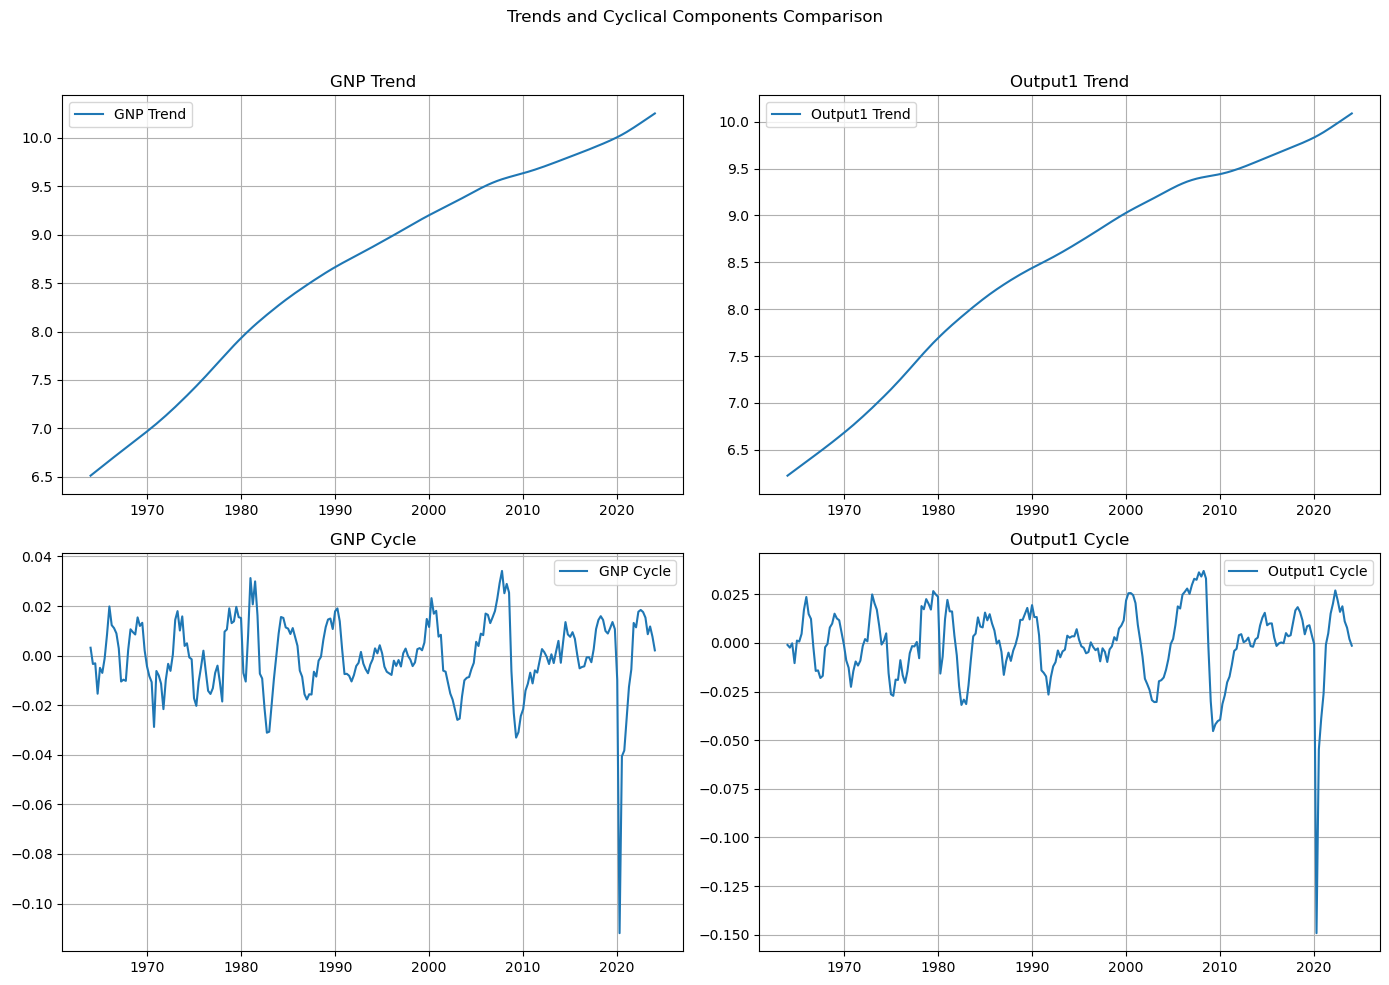

In [23]:
# Plot trends and cyclical components for comparison
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
fig.suptitle('Trends and Cyclical Components Comparison')

axes[0, 0].plot(trend['GNP'], label='GNP Trend')
axes[0, 0].set_title('GNP Trend')
axes[1, 0].plot(cycle['GNP'], label='GNP Cycle')
axes[1, 0].set_title('GNP Cycle')

axes[0, 1].plot(trend['Output1'], label='Output1 Trend')
axes[0, 1].set_title('Output1 Trend')
axes[1, 1].plot(cycle['Output1'], label='Output1 Cycle')
axes[1, 1].set_title('Output1 Cycle')

for ax in axes.flat:
    ax.legend()
    ax.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [24]:
###
#can mess around with these to make it more accurate i think is what he said
pkss = 10 # Capital to output ratio
alpha = 1/3 # Capital share in production
lss = 2/3 # Leisure share
pcss = 3/4 # Consumption to output ratio
rho_z = 0.95  # Persistence of leisure shock
sigma_z = 0.01  # Standard deviation of leisure shock
n = 1/3 # Labor

mu = 1.0  # Parameter for leisure in utility function
nu = 5.0 # Risk aversion of leisure

In [25]:
d = (1-pcss)/pkss # Depreciation Rate
print(f"Depcreciation Rate (d): {d}")
B=(1-alpha)*pkss**((1-mu)*alpha/(1-alpha))*(pcss*(1-lss))**(-mu)*lss**nu # Utility paramater
print(f"Utility Parameter (B): {B}")
delta=1/(1-d+alpha/pkss) # discount rate
print(f"Discount Rate (delta): {delta}")
k_ss=((1/delta-1+d)/alpha)**(1/(alpha-1))*(1-lss) # capital steady state
print(f"Steady-State Output (k_ss): {k_ss}")
yss=k_ss/pkss # output steady state 
print(f"Steady-State Output (yss): {yss}")
css=pcss*yss # consumption steady state  
print(f"Steady-State Output (css): {css}")
I_ss=d*k_ss # Investment steady state
print(f"Steady-State Output (I_ss): {I_ss}")

Depcreciation Rate (d): 0.025
Utility Parameter (B): 0.35116598079561034
Discount Rate (delta): 0.9917355371900827
Steady-State Output (k_ss): 10.540925533894606
Steady-State Output (yss): 1.0540925533894607
Steady-State Output (css): 0.7905694150420955
Steady-State Output (I_ss): 0.2635231383473652


In [26]:
# Log of leisure shock
# log(z_t) = ρ_z * log(z_{t-1}) + ε_z_t
def log_leisure_shock(rho_z, log_z_t_minus_1, epsilon_z_t):
    return rho_z * log_z_t_minus_1 + epsilon_z_t


In [27]:
# Define the parameters for the leisure shock with further refined range
rho_z_values = np.linspace(0.97, 0.99, 50)  # Narrow range around the best value found
sigma_z_values = np.linspace(0.45, 0.55, 50)  # Narrow range around the best value found

# Function to simulate the model with scaling adjustment
def simulate_model(rho_z, sigma_z, T=1000):
    # Initialize arrays to store simulated data
    z_t = np.zeros(T)
    y_t = np.zeros(T)
    c_t = np.zeros(T)
    k_t = np.zeros(T)
    g_t = np.zeros(T) #This is k_t[t-1]
   
    # Initial conditions
    z_t[0] = 1
    k_t[0] = k_ss
    n_ss = 1/3
    
    # Generate shocks
    epsilon_z_t = np.random.normal(0, sigma_z, T)
    
    for t in range(1, T):
        log_z_t = rho_z * np.log(z_t[t-1]) + epsilon_z_t[t]
        z_t[t] = np.exp(log_z_t)
        y_t[t] = z_t[t] * k_t[t-1]**alpha * (n_ss)**(1 - alpha)
        g_t[t] = (y_t[t] / (z_t[t] * (n_ss)**(1 - alpha)))**(1 / alpha)
        c_t[t] = y_t[t] - delta * g_t[t]
        k_t[t] = (1 - delta) * g_t[t] + y_t[t] - c_t[t]
    return y_t, c_t, k_t, z_t, g_t

# Assuming the correct key is identified as 'Output1'
target_std_output = np.std(data['Output1'])  # Replace 'Output1' with the correct key

# Continue with the simulation and finding the best match
results = []

for rho_z in rho_z_values:
    for sigma_z in sigma_z_values:
        y_t, c_t, k_t, z_t, g_t = simulate_model(rho_z, sigma_z)
        std_output = np.std(y_t)
        results.append((rho_z, sigma_z, std_output))

# Find the parameter set that matches the standard deviation of US output
best_match = min(results, key=lambda x: abs(x[2] - target_std_output))

rho_z_best, sigma_z_best, best_std_output = best_match
print(f"Best match for leisure shock parameters:")
print(f"rho_z: {rho_z_best}, sigma_z: {sigma_z_best}, std_output: {best_std_output}")
print(f"Empirical standard deviation of output from US data: {target_std_output}")

Best match for leisure shock parameters:
rho_z: 0.9887755102040816, sigma_z: 0.5316326530612245, std_output: 6092.379112199697
Empirical standard deviation of output from US data: 6330.797791153277


In [28]:
# Calculate the empirical investment to output ratio
empirical_i_y = data['Investment'].mean() / data['GNP'].mean()
print(f"Empirical Investment to Output Ratio: {empirical_i_y}")

# Calculate the empirical capital to output ratio
d = 0.025
solve_capital = data['Investment'].mean() / d
empirical_k_y = solve_capital / data['Output1'].mean()
print(f"Empirical Capital to Output Ratio: {empirical_k_y}")

# Calculate the standard deviations
std_output = data['Output1'].std() / 10000
std_consumption = data['Consumption'].std() / 10000
std_investment = data['Investment'].std() / 10000

print(f"Standard Deviation of Output: {std_output}")
print(f"Standard Deviation of Consumption: {std_consumption}")
print(f"Standard Deviation of Investment: {std_investment}")

# Calculate the correlations
correlation_output_consumption = data['Output1'].corr(data['Consumption'])
correlation_output_investment = data['Output1'].corr(data['Investment'])

print(f"Correlation between Output and Consumption: {correlation_output_consumption}")
print(f"Correlation between Output and Investment: {correlation_output_investment}")

Empirical Investment to Output Ratio: 0.25005257763406186
Empirical Capital to Output Ratio: 12.070028814761942
Standard Deviation of Output: 0.6343973243055688
Standard Deviation of Consumption: 0.4499747420668104
Standard Deviation of Investment: 0.18552649903009377
Correlation between Output and Consumption: 0.9992846825535987
Correlation between Output and Investment: 0.9957847422767996


In [29]:
import numpy as np

T = 10000
sigma = 0.01
rho = 0.95
tet = np.ones(T)
epsi = np.random.randn(T) * sigma
for t in range(1, T):
    tet[t] = tet[t-1] ** rho * np.exp(epsi[t])

# Additional shock (labor shock)
sigma_labor = .01
rho_labor = .90
labor_shock = np.ones(T)
epsi_labor = np.random.randn(T) * sigma_labor
for t in range(1, T):
    labor_shock[t] = labor_shock[t-1] ** rho_labor * np.exp(epsi_labor[t])

np.savez('shock.npz', tet=tet, labor_shock=labor_shock)

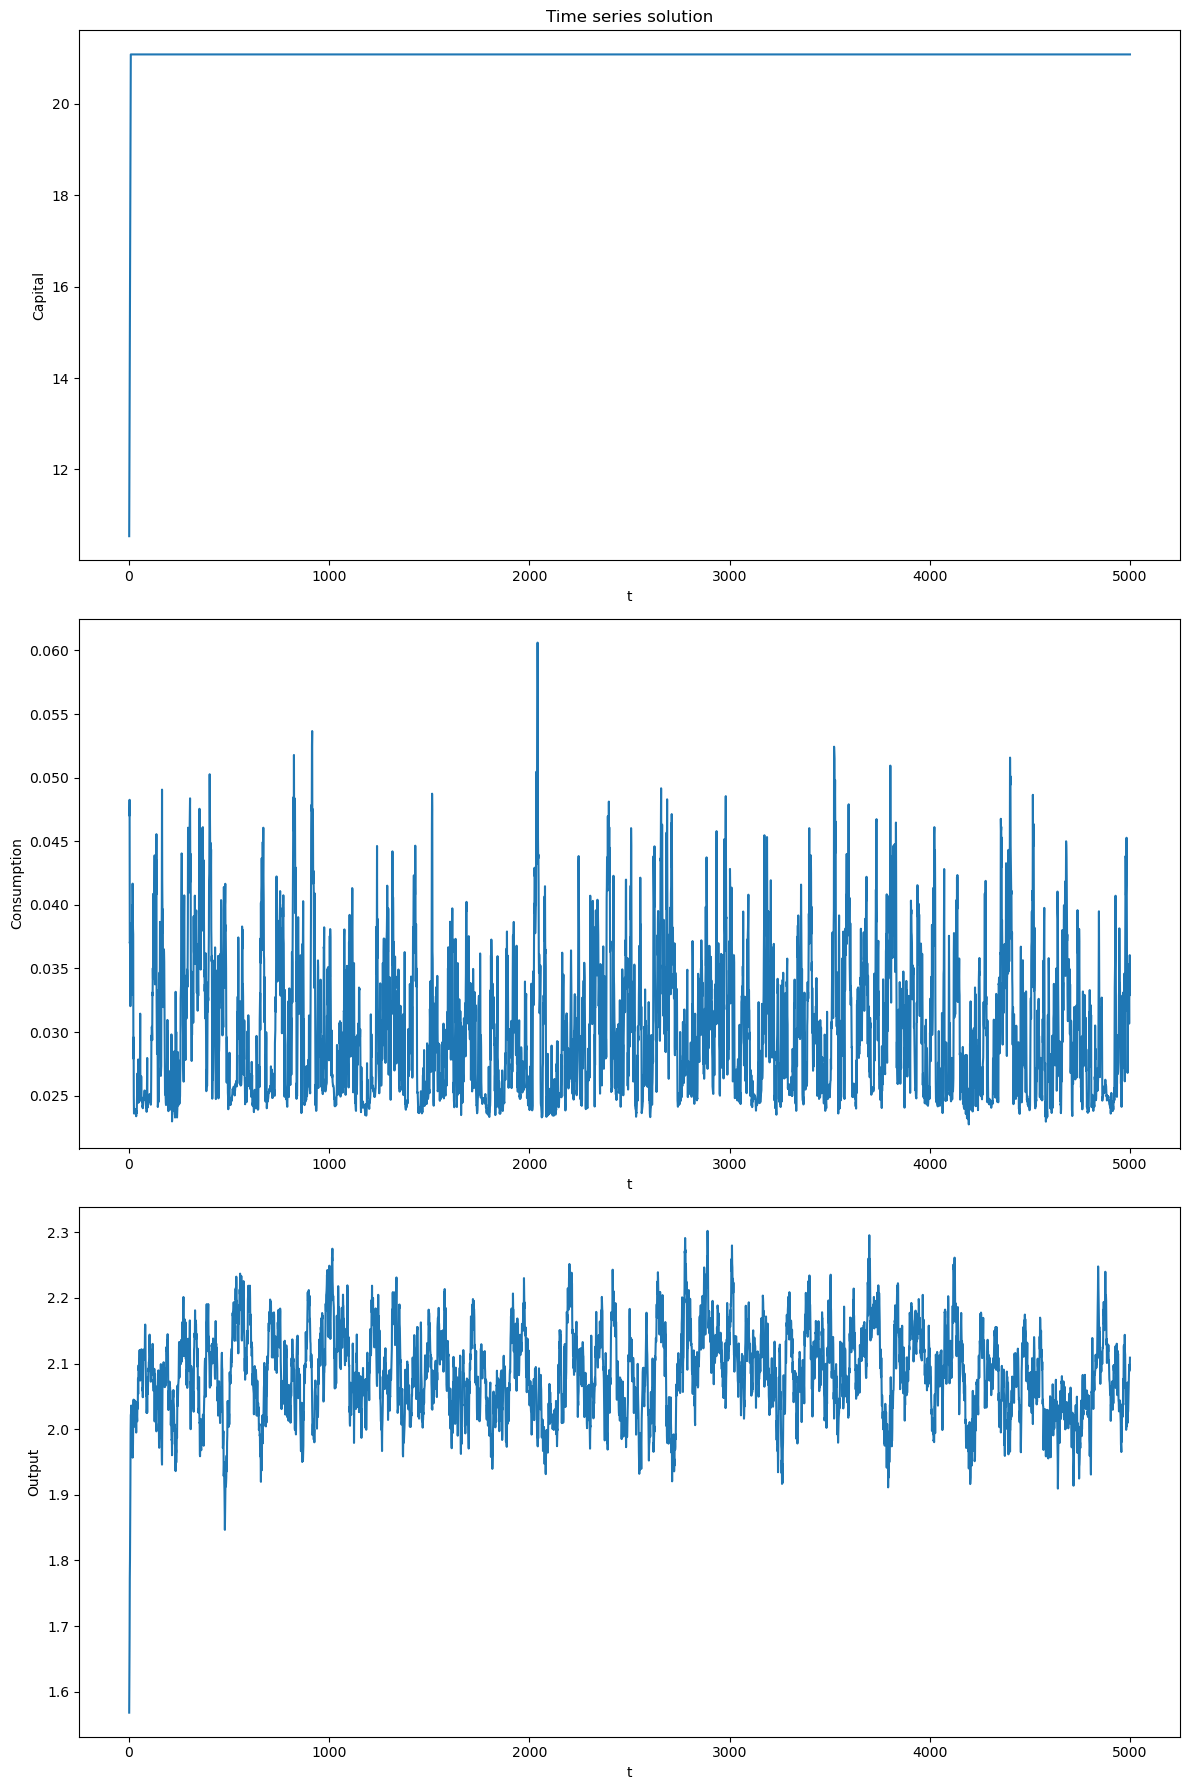

  Metric  Empirical Value  Simulated Mean Confidence Interval  Within Interval
     i/y         0.250053        0.253969    [0.1954, 0.3125]             True
     k/y        12.070029       10.111060   [9.4615, 10.7606]            False
 sigma_y         0.634397        0.005629    [0.0663, 0.0663]            False
 sigma_c         0.449975        0.011529    [0.0056, 0.0056]            False
 sigma_k         0.185526        0.267198    [0.2672, 0.2672]            False
corr_y_c         0.999285        0.046957  [-0.1558, -0.1558]            False
corr_y_k         0.995785        0.066295    [0.2031, 0.2031]            False


In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Define functions
def labor(n, nu, alpha, am):
    return (1-n)**(-nu) * n**alpha - am

def object_func(ksiz, X):
    return np.exp(X @ ksiz)

# Load shocks
shocks = np.load('shock.npz')
tet = shocks['tet'][:5000]
labor_shock = shocks['labor_shock'][:5000]

# Initialize parameters
T = 5000
alpha = 1/3
lss = 2/3
pkss = 10
pcss = 3/4
mu = 1.0
nu = 5.0

# Solve for steady state
d = (1 - pcss) / pkss
B = (1 - alpha) * pkss ** ((1 - mu) * alpha / (1 - alpha)) * (pcss * (1 - lss)) ** (-mu) * lss ** nu
delta = 1 / (1 - d + alpha / pkss)
kss = ((1 / delta - 1 + d) / alpha) ** (1 / (alpha - 1)) * (1 - lss)
yss = kss / pkss
css = pcss * yss

# Bounds on labor term
N_lower = (1 - lss) * 0.5
N_upper = (1 - lss) * 2

# Initialize time series
k = np.full(T + 1, kss)
c = np.zeros(T)
n = np.zeros(T)
e = np.zeros(T - 1)

# Initialize algorithm parameters
beta = np.array([np.log(lss ** (-nu) / delta), -0.001, -0.001])
crate = 0.007
criter = 1e-6
update = 0.5
maxiter = 100

def compute_statistics(k, c, n, tet, labor_shock, alpha, d):
    y = tet * k[:-1] ** alpha * n ** (1 - alpha)  # Use n directly here
    i = k[1:] - (1 - d) * k[:-1]
    
    # Ratios
    i_y = i / y
    k_y = k[:-1] / y
    
    # Standard deviations
    sigma_c = np.std(c)
    sigma_n = np.std(n)
    sigma_k = np.std(k[:-1])
    sigma_i = np.std(i)
    sigma_y = np.std(y)
    w = (1 - alpha) * y / n
    sigma_w = np.std(w)
    
    # Correlations
    corr_y_c = np.corrcoef(y, c)[0, 1]
    corr_y_n = np.corrcoef(y, n)[0, 1]
    corr_y_k = np.corrcoef(y, k[:-1])[0, 1]
    corr_y_i = np.corrcoef(y, i)[0, 1]
    corr_y_w = np.corrcoef(y, w)[0, 1]

    return k_y, i_y, sigma_c, sigma_n, sigma_k, sigma_i, sigma_y, sigma_w, corr_y_c, corr_y_n, corr_y_k, corr_y_i, corr_y_w

# Main loop
iteration = 0
dif = 2e-5
hit = 1

while dif > criter or hit == 1:
    up_bound = kss * (2 - np.exp(-crate * iteration))
    low_bound = kss * np.exp(-crate * iteration)
    hit = 0

    # Compute time series
    for t in range(T):
        n[t] = 1 - (delta * np.exp(beta[0] + beta[1] * np.log(k[t]) + beta[2] * np.log(tet[t]))) ** (-1 / nu)
        n[t] *= labor_shock[t]  # Incorporate labor shock
        n[t] = np.clip(n[t], N_lower, N_upper)
        c[t] = (1 / (tet[t] * k[t] ** alpha * n[t] ** -alpha * (1 - alpha)) * B * (1 - n[t]) ** -nu) ** (-1 / mu)
        k[t+1] = (1 - d) * k[t] + tet[t] * k[t] ** alpha * n[t] ** (1 - alpha) - c[t]
        k[t+1] = np.clip(k[t+1], low_bound, up_bound)
        if k[t+1] == low_bound or k[t+1] == up_bound:
            hit = 1

    # Compute expectation part
    for t in range(T - 1):
        e[t] = ((1 - n[t+1]) ** (-nu) * (1 - d + alpha * tet[t+1] * k[t+1] ** (alpha - 1) * n[t+1] ** (1 - alpha))
                * tet[t] / tet[t+1] * (k[t] / k[t+1]) ** alpha * (n[t] / n[t+1]) ** -alpha)

    # Recompute beta using NLLS regression
    X = np.column_stack((np.ones(T - 1), np.log(k[:T-1]), np.log(tet[:T-1])))
    result = minimize(lambda b: np.sum((e - object_func(b, X))**2), beta)
    ksi = result.x

    # Update beta for next iteration
    iteration += 1
    dif = np.linalg.norm(beta - ksi)
    #print(f'Iteration {iteration}, dif = {dif}')
    if dif > criter:
        beta = update * ksi + (1 - update) * beta
    else:
        break

# Compute statistics
k_y, i_y, sigma_c, sigma_n, sigma_k, sigma_i, sigma_y, sigma_w, corr_y_c, corr_y_n, corr_y_k, corr_y_i, corr_y_w = compute_statistics(k, c, n, tet, labor_shock, alpha, d)

means = np.array([np.mean(k_y), np.mean(i_y), sigma_c, sigma_n, sigma_k, sigma_i, sigma_y, sigma_w, corr_y_c, corr_y_n, corr_y_k, corr_y_i, corr_y_w])
stds = np.array([np.std(k_y), np.std(i_y), np.std(sigma_c), np.std(sigma_n), np.std(sigma_k), np.std(sigma_i), np.std(sigma_y), np.std(sigma_w), np.std(corr_y_c), np.std(corr_y_n), np.std(corr_y_k), np.std(corr_y_i), np.std(corr_y_w)])
intervals = np.array([means - 2 * stds, means + 2 * stds]).T

# Plot the time series solution y, c, and k
time = np.arange(1, T + 1)
plt.figure(figsize=(12, 18))  # Adjust the figure size

plt.subplot(3, 1, 1)
plt.plot(time, k[:T])
plt.xlabel('t')
plt.ylabel('Capital')
plt.title('Time series solution')

plt.subplot(3, 1, 2)
plt.plot(time, c)
plt.xlabel('t')
plt.ylabel('Consumption')

plt.subplot(3, 1, 3)
plt.plot(time, tet * k[:T] ** alpha * n ** (1 - alpha))  # Use n directly here
plt.xlabel('t')
plt.ylabel('Output')

plt.tight_layout()
plt.show()

# Empirical values
empirical_values = {
    'i/y': 0.25005257763406186,
    'k/y': 12.070028814761942,
    'sigma_y': 0.6343973243055688,
    'sigma_c': 0.4499747420668103,
    'sigma_k': 0.18552649903009376,
    'corr_y_c': 0.9992846825535995,
    'corr_y_k': 0.9957847422767997,
}

# Compute confidence intervals
confidence_intervals = {
    'k/y': (means[0] - 2 * stds[0], means[0] + 2 * stds[0]),
    'i/y': (means[1] - 2 * stds[1], means[1] + 2 * stds[1]),
    'sigma_y': (means[6] - 2 * stds[6], means[6] + 2 * stds[6]),
    'sigma_c': (means[2] - 2 * stds[2], means[2] + 2 * stds[2]),
    'sigma_k': (means[4] - 2 * stds[4], means[4] + 2 * stds[4]),
    'corr_y_c': (means[8] - 2 * stds[8], means[8] + 2 * stds[8]),
    'corr_y_k': (means[10] - 2 * stds[10], means[10] + 2 * stds[10])
}

# Check if empirical values fall within the confidence intervals
comparison_results = {
    'Metric': [],
    'Empirical Value': [],
    'Simulated Mean': [],
    'Confidence Interval': [],
    'Within Interval': []
}

for metric, empirical_value in empirical_values.items():
    mean_value = means[['k/y', 'i/y', 'sigma_y', 'sigma_c', 'sigma_k', 'corr_y_c', 'corr_y_k'].index(metric)]
    ci_lower, ci_upper = confidence_intervals[metric]
    within_interval = ci_lower <= empirical_value <= ci_upper
    
    comparison_results['Metric'].append(metric)
    comparison_results['Empirical Value'].append(empirical_value)
    comparison_results['Simulated Mean'].append(mean_value)
    comparison_results['Confidence Interval'].append(f"[{ci_lower:.4f}, {ci_upper:.4f}]")
    comparison_results['Within Interval'].append(within_interval)

comparison_df = pd.DataFrame(comparison_results)

# Display the dataframe
print(comparison_df.to_string(index=False))